# **Dataset Reading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Project HYPERSPECTRAL/Datasets/pavia_Complete.csv')
data.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103,Label
0,647,499,464,371,291,319,365,322,296,305,277,219,219,222,201,162,157,183,204,194,198,216,249,284,294,322,338,342,336,342,362,365,348,341,324,316,293,274,251,244,...,192,227,287,376,493,633,763,913,1149,1442,1759,2102,2425,2689,2895,3058,3196,3252,3195,3297,3542,3550,3537,3545,3514,3477,3468,3433,3408,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,705,681,668,666,434,345,369,374,313,218,219,213,188,187,166,172,212,238,247,271,295,317,344,338,340,362,347,327,359,365,368,364,348,336,324,306,286,277,278,288,...,166,202,252,304,396,517,654,795,960,1186,1482,1795,2066,2286,2467,2603,2696,2725,2682,2770,2959,2999,2956,2914,2897,2867,2867,2877,2847,2826,2817,2734,2632,2589,2595,2611,2607,2607,2609,0
2,1084,875,706,623,493,477,439,364,339,304,267,199,207,251,240,215,200,198,222,233,235,233,250,266,280,315,337,357,379,375,351,324,328,321,296,277,253,225,213,229,...,155,200,261,318,386,480,596,736,898,1105,1338,1579,1795,1968,2107,2230,2324,2337,2278,2307,2448,2453,2423,2439,2453,2436,2449,2434,2375,2346,2350,2271,2217,2215,2185,2122,2108,2167,2183,0
3,1019,917,717,554,517,474,448,414,371,362,380,369,342,272,237,263,275,261,232,233,234,230,254,272,263,280,303,311,319,311,301,312,307,292,282,260,225,206,200,207,...,131,150,179,211,254,306,336,356,425,517,582,680,779,824,854,899,939,948,953,1006,1038,997,982,996,987,954,961,976,985,977,976,952,936,940,928,885,862,888,897,0
4,760,744,786,922,755,566,487,449,439,399,365,337,374,415,392,361,351,351,352,344,356,394,402,412,423,413,401,412,410,400,413,407,384,380,395,391,376,349,328,336,...,196,219,237,257,284,298,318,356,420,473,509,532,570,597,611,625,646,617,595,674,721,695,677,673,686,709,716,685,659,664,669,656,651,683,675,650,624,643,697,0


In [ ]:
list=data.loc[:,['Label']]
list1=list.values
target=data['Label']
target.head()
target=target.to_numpy()
print(target.shape)
print(target)

(207400,)
[0 0 0 ... 0 0 0]


In [ ]:
data=data.drop('Label',axis=1)
data.head()
data=data.to_numpy()

In [ ]:
std_data = MinMaxScaler().fit_transform(data)
std_data.shape
acc=np.zeros((15,20))

In [ ]:
print(acc)
print(acc.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(15, 20)


# **KNN Implemenation**

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  print("For band =",hell)
  for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred),"for k=",i)
    #print(hell-2,i-1)
    acc[hell-2][i-1]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec")
  max=np.argmax(acc[hell-2])
  print("Max accuracy=",acc[hell-2][max])
end=time.time()
print("Total Time Taken =",end-start,"sec")


For band = 2
Time taken for band 2  is = 79.92306017875671 sec
Max accuracy= 0.7968039674886348
For band = 3
Time taken for band 3  is = 86.9319064617157 sec
Max accuracy= 0.8039537126325941
For band = 4
Time taken for band 4  is = 99.75010371208191 sec
Max accuracy= 0.811000137760022
For band = 5
Time taken for band 5  is = 111.32214713096619 sec
Max accuracy= 0.8139895302383249
For band = 6
Time taken for band 6  is = 120.63142943382263 sec
Max accuracy= 0.8213665794186527
For band = 7
Time taken for band 7  is = 131.65396976470947 sec
Max accuracy= 0.8222620195619231
For band = 8
Time taken for band 8  is = 146.1242392063141 sec
Max accuracy= 0.8228474996555999
For band = 9
Time taken for band 9  is = 156.70541524887085 sec
Max accuracy= 0.8246383799421408
For band = 10
Time taken for band 10  is = 171.58517718315125 sec
Max accuracy= 0.8258782201405153
For band = 11
Time taken for band 11  is = 181.84879088401794 sec
Max accuracy= 0.8301832208293153
For band = 12
Time taken for ban

In [ ]:
print(acc.shape)
print(acc)

(15, 20)
[[0.70431189 0.77454195 0.75867888 0.77965284 0.77585067 0.78665794
  0.78338614 0.78950957 0.7882904  0.79205125 0.79095605 0.79321532
  0.79240253 0.79423474 0.79441383 0.7953506  0.79492354 0.7959223
  0.79600496 0.79680397]
 [0.73655462 0.78772558 0.77748312 0.79139689 0.78865546 0.79582587
  0.79391101 0.7981609  0.7967833  0.79986224 0.79972448 0.80119851
  0.80035818 0.80208018 0.8017771  0.8032167  0.8027552  0.80392616
  0.80328558 0.80395371]
 [0.74938008 0.79479956 0.78739496 0.79995867 0.79797493 0.8032167
  0.80279653 0.80650916 0.80559994 0.80832071 0.80762502 0.8092988
  0.80889241 0.81013914 0.80940212 0.81001515 0.81013914 0.81091748
  0.81049043 0.81100014]
 [0.75793498 0.79990357 0.79310511 0.80404326 0.80148781 0.80805207
  0.80657804 0.81058686 0.81004271 0.81175782 0.81142719 0.81302521
  0.81207467 0.81308031 0.81254305 0.81381044 0.81292878 0.81356936
  0.81314231 0.81398953]
 [0.76766083 0.80715663 0.80257611 0.81232263 0.81064196 0.81667585
  0.815415

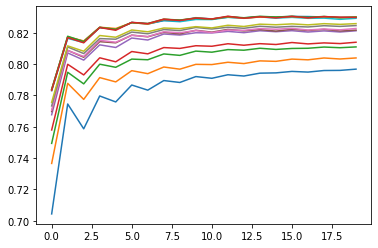

In [ ]:
for i in range(0,14):
  plt.plot(acc[i])
plt.show()

In [ ]:
temp=band=k=0
for i in range(0,14):
  for j in range(0,20):
    if temp<acc[i][j]:
      temp=acc[i][j]
      band=i+2
      k=j+1
print("BAND = ",band,"K-Value=",k,"MAX ACCURACY=",acc[band-2][k-1])

BAND =  15 K-Value= 12 MAX ACCURACY= 0.8305965008954401


Accuracy: 0.8305276208844193
KAppa Coeefecient: 0.4454356737480094
Average Time: 7.305687951296568


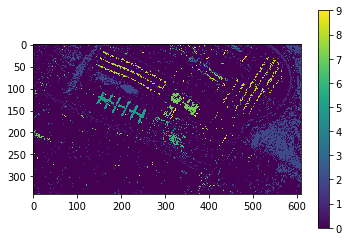

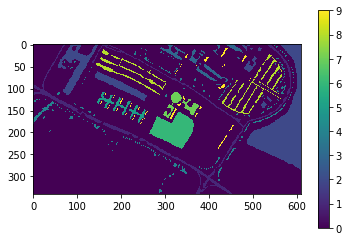

In [ ]:
model =PCA(n_components=band)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("KAppa Coeefecient:",metrics.cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/320)

output=knn.predict(pca)
output=np.reshape(output,(340,610))
gt=np.reshape(target,(340,610))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.77565092 0.80048216 0.79180328 0.79040501 0.79513018 0.79329797
 0.82574735 0.83269045 0.81600771 0.80159113]
0.8022806171648987


# **SVM Implementation**

In [ ]:
from sklearn import svm
acs=np.zeros(16)

In [ ]:
start=time.time()
for hell in range(2,17):
  start1=time.time()
  model =PCA(n_components=hell)
  pca = model.fit_transform(std_data)
  X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
  clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acs[hell-2]=metrics.accuracy_score(y_test, y_pred)
  end=time.time()
  print("Time taken for band",hell," is =",end-start1,"sec","Accuracy=",acs[hell-2])
end=time.time()
print("Total Time Taken =",end-start,"sec")

Time taken for band 2  is = 1050.8346011638641 sec Accuracy= 0.7955021352803416
Time taken for band 3  is = 952.6069839000702 sec Accuracy= 0.7990701198512192
Time taken for band 4  is = 822.9664463996887 sec Accuracy= 0.7996211599393855
Time taken for band 5  is = 637.6305916309357 sec Accuracy= 0.7998829039812646
Time taken for band 6  is = 512.6363525390625 sec Accuracy= 0.8047802727648437
Time taken for band 7  is = 470.3677978515625 sec Accuracy= 0.8069982091197134
Time taken for band 8  is = 441.2204670906067 sec Accuracy= 0.8096569775451165
Time taken for band 9  is = 382.6168866157532 sec Accuracy= 0.8160972585755614
Time taken for band 10  is = 292.3284373283386 sec Accuracy= 0.8169031547045048
Time taken for band 11  is = 272.50437688827515 sec Accuracy= 0.8251274280203885
Time taken for band 12  is = 271.32670497894287 sec Accuracy= 0.8262777242044359
Time taken for band 13  is = 276.19984006881714 sec Accuracy= 0.8263948202231712
Time taken for band 14  is = 281.42004513740

In [ ]:
max=np.argmax(acs)
print(max+2)
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
print("Kappa Coeefeicient=",cohen_kappa_score(y_test, y_pred))
print("Average Time:",(end-start)/14)

16
Accuracy= 0.8299283647885384
Kappa Coeefeicient= 0.3607022321091027
Average Time: 517.4607265506472


0.8303326904532304


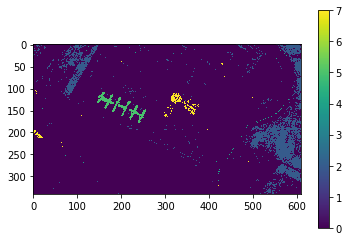

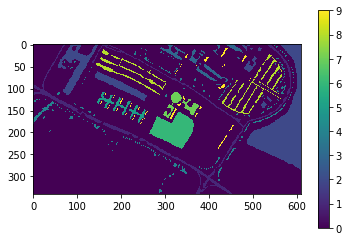

In [ ]:
model =PCA(n_components=max+2)
pca = model.fit_transform(std_data)
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.7, random_state = 100)
clf = svm.SVC(C=175,kernel='rbf',gamma=0.75)
clf.fit(X_train, y_train)
output = clf.predict(pca)
ans=metrics.accuracy_score(output,target)
print(ans)
output=np.reshape(output,(340,610))
gt=np.reshape(target,(340,610))
from matplotlib.pyplot import imshow, show, colorbar
imshow(output)
colorbar()
show()
imshow(gt)
colorbar()
show()

In [ ]:
from sklearn.model_selection import cross_val_score
svm = svm.SVC(C=175,kernel='rbf',gamma=0.75)
scores = cross_val_score(svm, pca, target, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

KeyboardInterrupt: ignored